# Import Libraries

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

# Recognizing and Understanding Data

In [2]:
pwd

'C:\\Users\\44778\\Desktop\\AI Summer Camp\\Proje 2'

In [3]:
my_data_dir = 'C:\\Users\\44778\\Desktop\\AI Summer Camp\\Proje 2\\PetImages2'

You may need to choose your own directory

In [4]:
os.listdir(my_data_dir)

['test', 'train', 'val']

In [5]:
val_path = my_data_dir+'/val/'
train_path = my_data_dir+'/train/'
# test_path = my_data_dir+'/test/'

In [6]:
os.listdir(train_path)

['Cat', 'Dog']

In [7]:
os.listdir(val_path)

['Cat', 'Dog']

In [8]:
# os.listdir(test_path)

In [9]:
classes = os.listdir(train_path)
classes

['Cat', 'Dog']

In [10]:
import pathlib

data_dir = pathlib.Path(train_path) # turn our training path into a Python path
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # created a list of class_names from the subdirectories
print(class_names)

['Cat' 'Dog']


In [11]:
class_names

array(['Cat', 'Dog'], dtype='<U3')

**Let's check how many images there are.**

In [12]:
os.listdir(train_path+'dog')

['0.jpg',
 '1.jpg',
 '10.jpg',
 '100.jpg',
 '1000.jpg',
 '10000.jpg',
 '10002.jpg',
 '10003.jpg',
 '10005.jpg',
 '10007.jpg',
 '10008.jpg',
 '10009.jpg',
 '1001.jpg',
 '10010.jpg',
 '10013.jpg',
 '10014.jpg',
 '10015.jpg',
 '10016.jpg',
 '10018.jpg',
 '1002.jpg',
 '10021.jpg',
 '10022.jpg',
 '10023.jpg',
 '10024.jpg',
 '10025.jpg',
 '10026.jpg',
 '10027.jpg',
 '10029.jpg',
 '1003.jpg',
 '10030.jpg',
 '10031.jpg',
 '10033.jpg',
 '10036.jpg',
 '10037.jpg',
 '10039.jpg',
 '1004.jpg',
 '10041.jpg',
 '10042.jpg',
 '10043.jpg',
 '10045.jpg',
 '10046.jpg',
 '10048.jpg',
 '1005.jpg',
 '10050.jpg',
 '10051.jpg',
 '10052.jpg',
 '10053.jpg',
 '10054.jpg',
 '10055.jpg',
 '10056.jpg',
 '10057.jpg',
 '10058.jpg',
 '10059.jpg',
 '1006.jpg',
 '10060.jpg',
 '10062.jpg',
 '10063.jpg',
 '10064.jpg',
 '10065.jpg',
 '10066.jpg',
 '10067.jpg',
 '10068.jpg',
 '10069.jpg',
 '1007.jpg',
 '10070.jpg',
 '10071.jpg',
 '10075.jpg',
 '10076.jpg',
 '10077.jpg',
 '10079.jpg',
 '1008.jpg',
 '10080.jpg',
 '10081.jpg',


In [13]:
len(os.listdir(train_path+'cat')), len(os.listdir(train_path+'dog'))

(8748, 8748)

In [14]:
len(os.listdir(val_path+'cat')), len(os.listdir(val_path+'dog'))

(2500, 2500)

In [15]:
# Walk through cell_images directory and list number of files
for dirpath, dirnames, filenames in os.walk(my_data_dir):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 3 directories and 0 images in 'C:\Users\44778\Desktop\AI Summer Camp\Proje 2\PetImages2'.
There are 2 directories and 0 images in 'C:\Users\44778\Desktop\AI Summer Camp\Proje 2\PetImages2\test'.
There are 0 directories and 1251 images in 'C:\Users\44778\Desktop\AI Summer Camp\Proje 2\PetImages2\test\Cat'.
There are 0 directories and 1251 images in 'C:\Users\44778\Desktop\AI Summer Camp\Proje 2\PetImages2\test\Dog'.
There are 2 directories and 0 images in 'C:\Users\44778\Desktop\AI Summer Camp\Proje 2\PetImages2\train'.
There are 0 directories and 8748 images in 'C:\Users\44778\Desktop\AI Summer Camp\Proje 2\PetImages2\train\Cat'.
There are 0 directories and 8748 images in 'C:\Users\44778\Desktop\AI Summer Camp\Proje 2\PetImages2\train\Dog'.
There are 2 directories and 0 images in 'C:\Users\44778\Desktop\AI Summer Camp\Proje 2\PetImages2\val'.
There are 0 directories and 2500 images in 'C:\Users\44778\Desktop\AI Summer Camp\Proje 2\PetImages2\val\Cat'.
There are 0 directories 

In [16]:
#val_dog = 2500
#val_cat = 2500
#train_dog = 8750
#train_cat = 8750
#train and valid sets are balanced

**Let's take an example images from both train-cat and train-dog folders to observe process** 

In [17]:
os.listdir(train_path+'Cat')[2]

'10.jpg'

In [18]:
os.listdir(train_path+'Dog')[2]

'10.jpg'

In [19]:
path1=train_path+'Cat'+'/0.jpg'
path2=train_path+'Dog'+'/0.jpg'

In [20]:
cat_img=imread(path1)
dog_img=imread(path2)

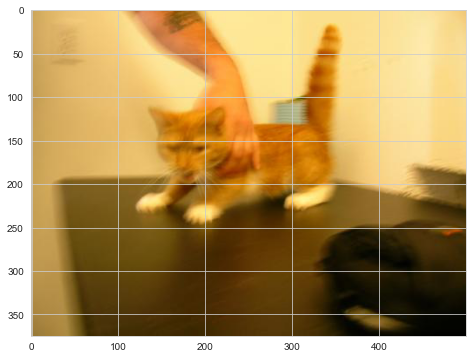

In [21]:
plt.imshow(cat_img)

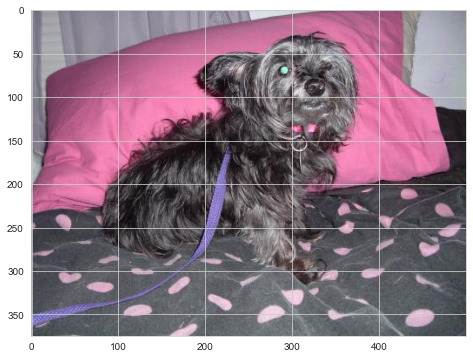

In [22]:
plt.imshow(dog_img)

In [23]:
# View an image
import random

def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

Image shape: (312, 356, 3)


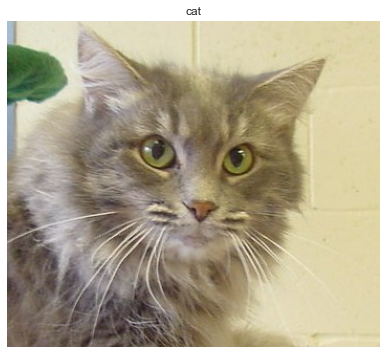

In [24]:
# View a random image from the training dataset
img = view_random_image(target_dir=train_path,
                        target_class="cat")

Image shape: (486, 480, 3)


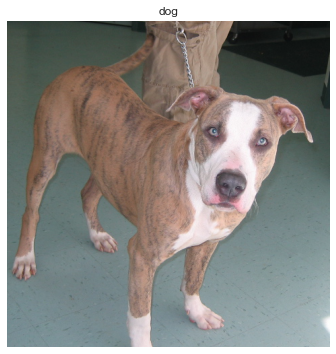

In [25]:
# View a random image from the training dataset
img = view_random_image(target_dir=train_path,
                        target_class="dog")

Image shape: (375, 500, 3)


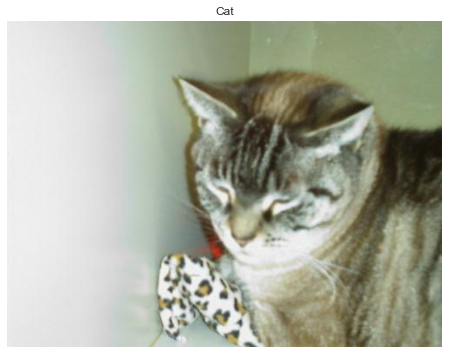

In [26]:
# View a random image from the training dataset
import random
img = view_random_image(target_dir=train_path,
                        target_class=random.choice(class_names)) # get a random class name

# Data Preprocessing

## Defining Input Shape

**Let's decide on the final dimension of these images.**

In [27]:
cat_img.shape

(375, 500, 3)

In [28]:
dog_img.shape

(375, 500, 3)

In [29]:
image_shape = (128,128,3)

## Scalling

**Let's check the images if they are needed to be scaled or not**

In [30]:
cat_img.max()

255

In [31]:
cat_img.min()

0

As we see above, images dont need to be scaled

## Image Data Generator

**Image Manipulation**

We can use the ImageDataGenerator to manipulate the images with rotation, resizing, and scaling so the model becomes more robust to different images that our data set doesn't have. ImageDataGenerator does the followings.

* Accepts a batch of images used for training.
* Applies a series of random transformations to each image in the batch.
* Replaces the original batch with randomly transformed batch.
* Training the CNN on this randomly transformed batch.

The goal of applying data augmentation is to have a more generalized model.

Data augmentation is a way to try and prevent a model overfitting. If your model is overfiting (e.g. the validation loss keeps increasing), you may want to try using data augmentation.

In [32]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [33]:
image_gen = ImageDataGenerator(rotation_range=15, # rotate the image 15 degrees
                               width_shift_range=0.10, # Shift the pic width by a max of 10%
                               height_shift_range=0.10, # Shift the pic height by a max of 10%
                               #rescale=1/255, # Rescale the image by normalzing it.
                               shear_range=0.1, # Shear means cutting away part of the image (max 10%)
                               zoom_range=0.1, # Zoom in by 10% max
                               horizontal_flip=True, # Allow horizontal flipping
                               fill_mode='nearest' # Fill in missing pixels with the nearest filled value
                              )

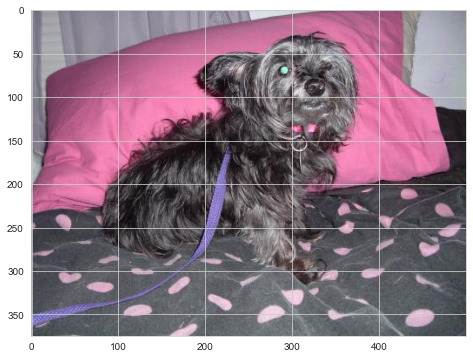

In [34]:
plt.imshow(dog_img);

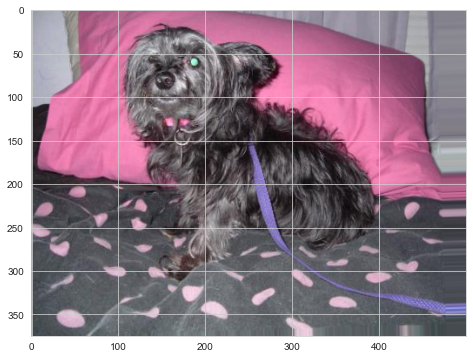

In [35]:
plt.imshow(image_gen.random_transform(dog_img));

### Taking the path to a directory & Generating batches of augmented data

flow_from_directory function works with images organized in sub-directories. Your directories should include only one class of images, so one folder per class of images.

In [36]:
#help(image_gen.flow_from_directory)
#Takes the path to a directory & generates batches of augmented data.

In [37]:
image_gen.flow_from_directory(train_path)

Found 17496 images belonging to 2 classes.


In [38]:
image_gen.flow_from_directory(val_path)

Found 5000 images belonging to 2 classes.


In [39]:
# image_gen.flow_from_directory(test_path)

In [40]:
batch_size = 32

In [41]:
train_image_gen = image_gen.flow_from_directory(directory=train_path,
                                                target_size=image_shape[:2],
                                                color_mode='rgb',
                                                batch_size=batch_size,
                                                class_mode='binary',
                                                shuffle=True)

Found 17496 images belonging to 2 classes.


In [42]:
val_image_gen = image_gen.flow_from_directory(directory=val_path,
                                              target_size=image_shape[:2],
                                              color_mode='rgb',
                                              batch_size=batch_size,
                                              class_mode='binary',
                                              shuffle=False)

Found 5000 images belonging to 2 classes.


In [43]:
train_image_gen.class_indices

{'Cat': 0, 'Dog': 1}

In [44]:
train_image_gen[0][0].shape

(32, 128, 128, 3)

In [45]:
len(train_image_gen), len(val_image_gen)

(547, 157)

In [46]:
len(train_image_gen)*batch_size, len(val_image_gen)*batch_size 

(17504, 5024)

In [47]:
# Get a sample of the training data batch 
images, labels = train_image_gen.next() # get the 'next' batch of images/labels
len(images), len(labels)

(32, 32)

In [48]:
# Get a sample of the testing data batch 
images, labels = val_image_gen.next() # get the 'next' batch of images/labels
len(images), len(labels)

(32, 32)

# Modelling-1

In [49]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

In [50]:
model3 = Sequential()

model3.add(Conv2D(filters=16, kernel_size=(3,3), padding='same', input_shape=image_shape, activation='relu'))
model3.add(BatchNormalization())
model3.add(Conv2D(filters=16, kernel_size=(3,3), padding='same', activation='relu'))
model3.add(BatchNormalization())
model3.add(MaxPooling2D(pool_size=(2, 2)))

model3.add(Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu'))
model3.add(BatchNormalization())
model3.add(Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu'))
model3.add(BatchNormalization())
model3.add(MaxPooling2D(pool_size=(2, 2)))

model3.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'))
model3.add(BatchNormalization())
model3.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'))
model3.add(BatchNormalization())
model3.add(MaxPooling2D(pool_size=(2, 2)))

model3.add(Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu'))
model3.add(BatchNormalization())
model3.add(Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu'))
model3.add(BatchNormalization())
model3.add(MaxPooling2D(pool_size=(2, 2)))

model3.add(Flatten())

model3.add(Dense(128))
model3.add(Activation('relu'))

model3.add(Dense(128))
model3.add(Activation('relu'))

model3.add(Dense(1))
model3.add(Activation('sigmoid'))

model3.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [51]:
model3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 16)      448       
                                                                 
 batch_normalization (BatchN  (None, 128, 128, 16)     64        
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 16)      2320      
                                                                 
 batch_normalization_1 (Batc  (None, 128, 128, 16)     64        
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 16)       0         
 )                                                               
                                                        

In [52]:
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights = True)

In [55]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [56]:
model3.fit(train_image_gen,
          epochs=15,
          steps_per_epoch=len(train_image_gen),
          validation_data=val_image_gen,
          validation_steps=len(val_image_gen),
          callbacks=[early_stop])

Epoch 1/15
265/547 [=============>................] - ETA: 3:24 - loss: 0.5330 - accuracy: 0.7348

C:\Users\44778\anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:845: UserWarning: Truncated File Read
  warnings.warn(str(msg))


547/547 [==============================] - 440s 805ms/step - loss: 0.5088 - accuracy: 0.7518 - val_loss: 0.5128 - val_accuracy: 0.7468
Epoch 2/15
547/547 [==============================] - 438s 801ms/step - loss: 0.4186 - accuracy: 0.8068 - val_loss: 0.4842 - val_accuracy: 0.7636
Epoch 3/15
547/547 [==============================] - 434s 793ms/step - loss: 0.3424 - accuracy: 0.8503 - val_loss: 0.5547 - val_accuracy: 0.7484
Epoch 4/15
547/547 [==============================] - 433s 792ms/step - loss: 0.2787 - accuracy: 0.8833 - val_loss: 0.3169 - val_accuracy: 0.8678
Epoch 5/15
547/547 [==============================] - 433s 791ms/step - loss: 0.2390 - accuracy: 0.9019 - val_loss: 0.2844 - val_accuracy: 0.8754
Epoch 6/15
547/547 [==============================] - 432s 789ms/step - loss: 0.2255 - accuracy: 0.9084 - val_loss: 0.3862 - val_accuracy: 0.8212
Epoch 7/15
547/547 [==============================] - 431s 787ms/step - loss: 0.2107 - accuracy: 0.9148 - val_loss: 0.2246 - val_accura

In [57]:
summary = pd.DataFrame(model3.history.history)

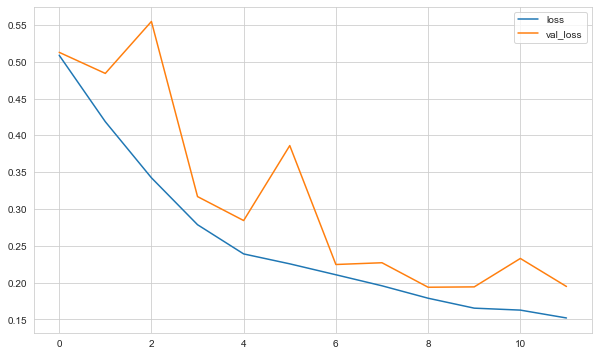

In [58]:
summary[["loss", "val_loss"]].plot();

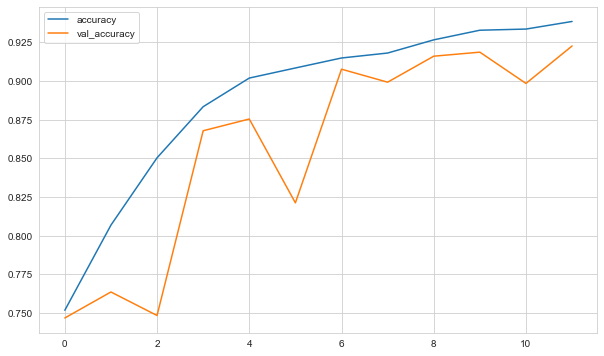

In [59]:
summary[["accuracy", "val_accuracy"]].plot();

# Evaluation on Test Data

In [60]:
from sklearn.metrics import classification_report, confusion_matrix

In [61]:
score = model3.evaluate(val_image_gen)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

157/157 [==============================] - 37s 233ms/step - loss: 0.1948 - accuracy: 0.9194
Test loss: 0.1947796493768692
Test accuracy: 0.9193999767303467


In [62]:
pred_prob = model3.predict(val_image_gen)
pred_prob

157/157 [==============================] - 36s 230ms/step


array([[9.8074042e-07],
       [2.2641645e-01],
       [2.3530172e-02],
       ...,
       [9.8612422e-01],
       [9.9813235e-01],
       [2.6994151e-01]], dtype=float32)

In [63]:
y_pred = pred_prob > 0.5
y_pred

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [False]])

In [64]:
y_test = val_image_gen.classes

In [65]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.90      0.92      2500
           1       0.91      0.94      0.92      2500

    accuracy                           0.92      5000
   macro avg       0.92      0.92      0.92      5000
weighted avg       0.92      0.92      0.92      5000



In [66]:
confusion_matrix(y_test, y_pred)

array([[2259,  241],
       [ 162, 2338]], dtype=int64)